# Exercises from Linear Algebra for DS

## Chapter 8

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy
import pandas as pd
from latools import vec, row,frobenius_distance
from skimage import io,color
from scipy.signal import convolve2d

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)

### Exercise 8.1

Illustrate that
$$ (A^{-1})^{-1} = A $$

In [2]:
A = np.random.randint(low=0, high=10, size=(4, 4))
A

array([[2, 1, 1, 5],
       [5, 1, 0, 6],
       [8, 7, 7, 4],
       [3, 9, 4, 9]])

In [3]:
np.linalg.inv(np.linalg.inv(A))

array([[ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         5.00000000e+00],
       [ 5.00000000e+00,  1.00000000e+00, -8.81239526e-16,
         6.00000000e+00],
       [ 8.00000000e+00,  7.00000000e+00,  7.00000000e+00,
         4.00000000e+00],
       [ 3.00000000e+00,  9.00000000e+00,  4.00000000e+00,
         9.00000000e+00]])

In [4]:
np.round(np.linalg.inv(np.linalg.inv(A))) == A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### Exercise 8.2

Create the inversion of full-ranked matrix

In [5]:
def minor(X, i, j):
    '''Creates minor of a matrix'''
    return X[
        np.array(list(range(i)) + list(range(i + 1, A.shape[0])))[:, np.newaxis],
        np.array(list(range(j)) + list(range(j + 1, A.shape[1]))),
    ]

# Got that from https://stackoverflow.com/questions/3858213/numpy-routine-for-computing-matrix-minors
# I find the solution neat

In [6]:
def cofactor(X, i, j):
    '''Calculates (i,j) matrix cofactor'''
    return (-1)**(i+j) * np.linalg.det(minor (X, i, j))

In [7]:
def adj(X):
    '''Calculates adjacent matrix'''
    adj = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            adj[j,i] = cofactor(X, i, j) # pay attention that the index order is reversed in order to 
                                         # save time for transposing the matrix
    return adj
            

In [8]:
def invert(X):
    '''inverts matrix'''
    if np.linalg.det(X) == 0:
        raise Exception('Passed singular matrix')
    return adj(X) / np.linalg.det(X)

In [9]:
# Let's test:

A = np.random.randint(0, 10, size=(6,6))
np.round(A @ invert(A))

array([[ 1., -0., -0., -0., -0., -0.],
       [ 0.,  1., -0., -0., -0., -0.],
       [ 0., -0.,  1., -0., -0., -0.],
       [ 0.,  0., -0.,  1., -0., -0.],
       [ 0., -0., -0., -0.,  1., -0.],
       [ 0., -0., -0.,  0., -0.,  1.]])

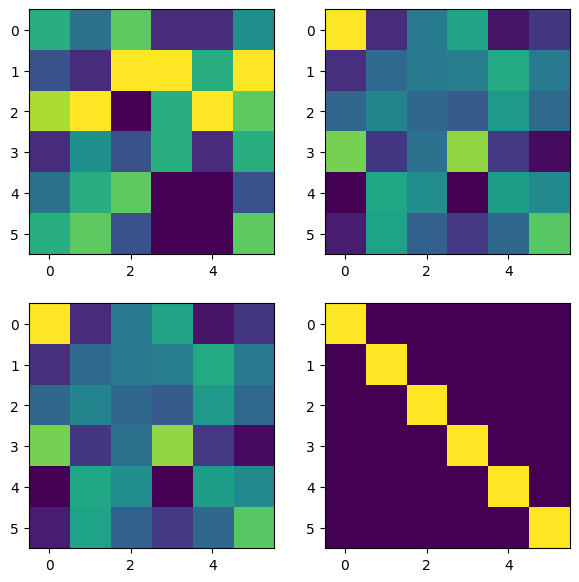

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.imshow(A)
ax2.imshow(adj(A))
ax3.imshow(invert(A))
ax4.imshow(A @ invert(A))

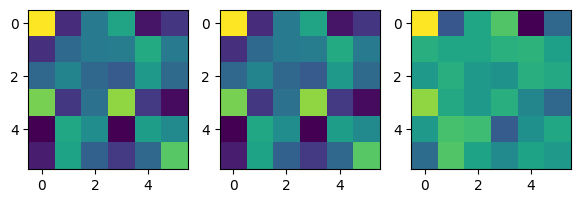

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(invert(A))
ax2.imshow(np.linalg.inv(A))
ax3.imshow(invert(A) - np.linalg.inv(A))

In [12]:
A, invert(A), np.linalg.inv(A)

(array([[6, 4, 7, 2, 2, 5],
        [3, 2, 9, 9, 6, 9],
        [8, 9, 1, 6, 9, 7],
        [2, 5, 3, 6, 2, 6],
        [4, 6, 7, 1, 1, 3],
        [6, 7, 3, 1, 1, 7]]),
 array([[ 0.52792091, -0.20607657,  0.03026833,  0.17725867, -0.26596435,
         -0.1803504 ],
        [-0.19764113, -0.02725295,  0.02771098,  0.04122295,  0.19912974,
          0.02782549],
        [-0.03252033,  0.06504065, -0.03252033, -0.07317073,  0.13821138,
         -0.02439024],
        [ 0.3565785 , -0.17794572,  0.00446582,  0.38680866, -0.17038818,
         -0.28890416],
        [-0.31356159,  0.18580862,  0.09958395, -0.3146685 ,  0.15775411,
          0.08759876],
        [-0.2470705 ,  0.17489217, -0.05458224, -0.17210581, -0.02858888,
          0.30882858]]),
 array([[ 0.52792091, -0.20607657,  0.03026833,  0.17725867, -0.26596435,
         -0.1803504 ],
        [-0.19764113, -0.02725295,  0.02771098,  0.04122295,  0.19912974,
          0.02782549],
        [-0.03252033,  0.06504065, -0.03252033, -0.0

In [13]:
# Let's test-2: singular matrix
B = np.random.randint(0, 10, size=(6,5))
B = np.concatenate((B, B[:, [2]]*2), axis=1)
np.round(B @ invert(B)) #> Exception: Passed singular matrix

Exception: Passed singular matrix

### Exercise 8.3

In [14]:
# Let us skip it since we already did the general case

### Exercise 8.4

Create right-inversed matrix

Well, the logic is the same as with the left inverted:

We have the idea that 

$$ (AA^T)(AA^T)^{-1} = I <=> A(A^T(AA^T)^{-1}) = I $$

And if (AA^T) is full-ranked (which **is** the case if A (long matrix) has the full row rank)
Than we just have to find the 
$$ A^T(AA^T)^{-1} $$

In [16]:
# Let's proceed

def right_invert(X):
    if np.linalg.matrix_rank(X) < X.shape[0]:
        raise Exception('Passed singular matrix')
    return X.T @ np.linalg.inv(X @ X.T)

In [17]:
# test:

A = np.random.randint(0, 10, size=(5,10))

In [18]:
np.round(A @ right_invert(A))

array([[ 1., -0.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0., -0.],
       [ 0., -0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  0.,  1.]])

In [19]:
right_invert(A)

array([[-0.01101071, -0.0070765 ,  0.02200504, -0.10816612,  0.08261846],
       [ 0.07782014,  0.04193178, -0.0836962 ,  0.0375972 , -0.0453164 ],
       [ 0.10828364, -0.00982591, -0.08250826,  0.14040748, -0.07904772],
       [-0.06573452, -0.01634754,  0.15870339, -0.17472584,  0.08323546],
       [ 0.01254726, -0.01627231,  0.0003213 ,  0.01671118,  0.01556624],
       [-0.01668223, -0.08798928, -0.02381605, -0.00609091,  0.12110393],
       [-0.03316088,  0.0582459 ,  0.01337514,  0.01138182, -0.0312148 ],
       [-0.01707286, -0.00695836,  0.05432626, -0.02229284,  0.01319981],
       [ 0.00101268,  0.07711363, -0.02955217,  0.06380588, -0.08044093],
       [-0.03213899,  0.01878675,  0.02364532,  0.03397669, -0.00724563]])

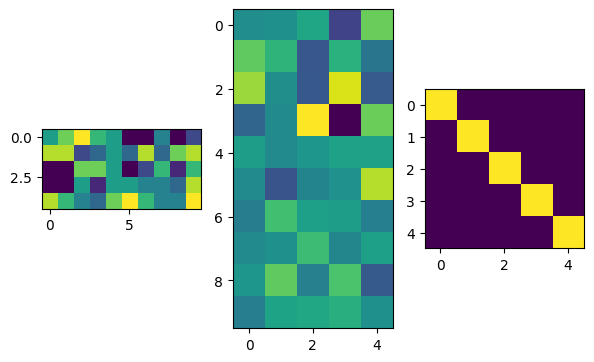

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(A)
ax2.imshow(right_invert(A))
ax3.imshow(A @ right_invert(A))

### Exercise 8.5

Illustrate that:

i) Pseudoinversed matrix equals inversed martix for full-ranked matrices

ii) pseudoinversed matrix equals left-inversd and right-inversed matrices where they exist

In [22]:
A = np.random.randint(0,10, size=(5,5))
frobenius_distance(np.linalg.inv(A), np.linalg.pinv(A))

1.2938106837124475e-15

In [156]:
A = np.random.randint(0, 10, size=(5,10))

In [23]:
frobenius_distance(right_invert(A), np.linalg.pinv(A))

4.811362435538465e-15

In [25]:
def left_invert(X):
    if np.linalg.matrix_rank(X) < X.shape[1]:
        raise Exception('Passed singular matrix')
    return np.linalg.inv(X.T @ X) @ X.T

In [26]:
A = np.random.randint(0, 10, size=(10,5))
frobenius_distance(left_invert(A), np.linalg.pinv(A))

2.7032333782078695e-16